In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_moons
from imblearn.datasets import make_imbalance
from sklearn.neighbors import NearestNeighbors

[[63 74 82 59 80]]


C:\Users\zheag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


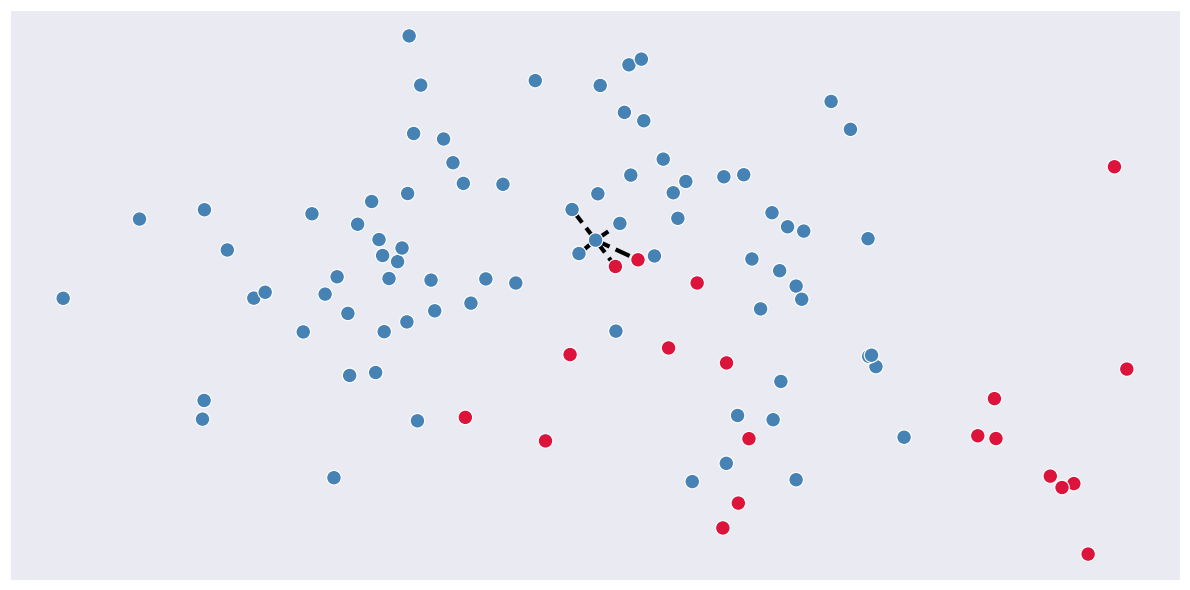

In [120]:
sns.set_style('dark')

np.random.seed(7)

# Geração do conjunto de dados
X, y = make_moons(n_samples=200, noise=0.35, random_state=42)
X_res, y_res = make_imbalance(X, y, sampling_strategy={0: 80, 1 : 20}, random_state = 7)
df = pd.DataFrame(np.column_stack((X_res, y_res)), columns = ['feature 1', 'feature 2', 'y'])

plt.figure(figsize = (12, 6))
point_size = 110 # Antes usava 70

df.iloc[64, :2] = df.iloc[64, :2] + np.array([-0.05, 0.085])
df.iloc[63, :2] = df.iloc[63, :2] + np.array([0, -0.2])

ax = sns.scatterplot(
    x = 'feature 1', 
    y = 'feature 2', 
    data = df, 
    hue = 'y', 
    palette = ['steelblue', 'crimson'], 
    legend = False,
    s = point_size
)

# Pega os vizinhos mais próximos de um ponto específico
knn = NearestNeighbors(n_neighbors = 5)
knn.fit(
    df.drop('y', axis = 1).drop(64), # Classe minoritária sem o ponto de interessses
    df['y'].drop(64)
)

print(knn.kneighbors(
    df.iloc[64, :2].values.reshape(1, -1) # k-vizinhos do ponto de interesse
)[1])
# Cria as linhas entre o ponto e seus vizinhos
for row in df.drop('y', axis = 1).drop(64).iloc[[74,63,59,82,80]].iterrows():
    ax.plot([df.iloc[64, 0], row[1][0]], [df.iloc[64, 1], row[1][1]], color = 'black', linestyle = '--', linewidth = 3, zorder = 0)


# Ajuste dos detalhes finais
ax.set(xticklabels = [], yticklabels = [], xlabel = None, ylabel = None)
plt.tight_layout()
plt.show()